## Интерполяция

Мы начнем с довольно простой задачи. Предположим функция f(x) задана нам в виде набора значений в нескольких точках. Наша цель -- подобрать аналитический вид для такой функции. Самое простое, что можно сделать -- попытаться подобрать многочлен вида
$P(x) = a_n x^n + ... + a_1 x + a_0$, который будет ее наилучшим образом приближать. 

Давайте попробуем понять, что значит наилучшим образом приближать. Если мы можем придумать такой многочлен, который проходит через все точки, то о лучшем и мечтать нельзя (хотя, дальше мы увидим, что это не совсем так). Что делать, если мы хотим многочлен достаточно маленькой степени?

В этом случае обычно пытаются минимизировать сумму квадратов ошибок во всех точках. Если значения функции f заданы нам для точке $x_i$, то мы хотим минимизировать величину $$L(P) = \sum_i (P(x_i) - f(x_i))^2 $$ Эту величину называют среднеквадратичным отклонением

Тут может возникнуть вопрос, почему мы берем именно сумму квадратов, а не, например, сумму модулей. Однозначного ответа на этот вопрос нет, наиболее удачный ответ, пожалуй такой: у суммы квадратов есть много удобных свойств, например это выпуклая, дифференцируемая функция. Тем не менее иногда другой выбор может быть оправданным. Если вам интересно чуть больше понять про смысл этих условий, решите такие задачи. Их решение необязательно для понимания дальнейшего, если хотите вы можете их пропустить.

Задача 1. Найдите число m такое, что для заданных $x_i$ сумма $\sum|m - x_i|$ минимальна

Задача 2. Найдите число m такое, что для заданных $x_i$ сумма $\sum(m - x_i)^2$ минимальна

Задача 3. Для какого набора чисел $a_i$, таких что $\sum a_i = 1$ величина $\sum a_i^2$ минимальна?

Задача 4. Для какого набора чисел $a_i$, таких что $\sum a_i = 1$ величина $\sum \sqrt{a_i}$ минимальна?


В питоне есть пакет scipy, который как раз умеет решать нашу задачу. Функция polyfit находит по заданному набору значений многочлен указанной степени

In [7]:
import scipy
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

Определим нашу функцию и посмотрим, как она выглядит

In [8]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

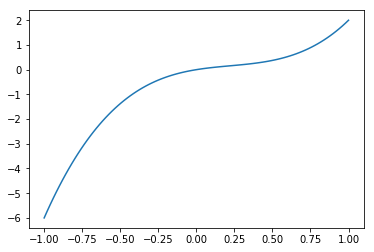

In [24]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))

In [ ]:
Теперь зададим набор точек и посмотрим что будет, если подобрать по ним коэффициенты нашего многочлена:

In [39]:
x = np.linspace(-1, 1, 10)
y = f(x)
coefs = scipy.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -3.93270787e-16])

scipy позволяет легко работать с многочленами, заданными их коэффициентами. Мы можем создать из них объект poly1d, который можно будет просто вызывать для получения нужных значений:

In [40]:
poly = scipy.poly1d(coefs)
poly(1)

1.1703703703703716

Давайте посмотрим, что у нас вышло. Построим на одном графики исходную функцию, заданные нам точки и наше приближение:

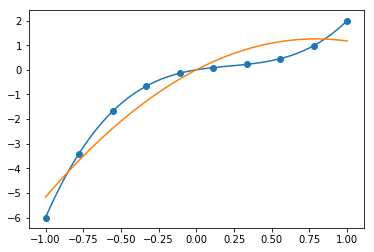

In [41]:
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Довольно ожидаемо, наша функция не очень похода на то, что мы искали. Наверное зря мы пытаемся приблизить кубическую функцию многочленом второй степени. Давайте попробуем 3-ю

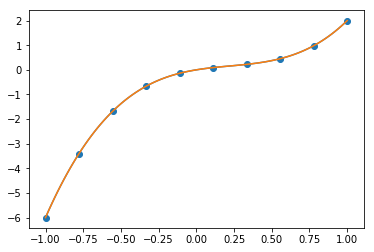

In [42]:
coefs = scipy.polyfit(x, y, deg = 3)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

На этот раз мы в точности угадали функцию. Можете проверть, что если увеличивать степень многочлена, результат не меняется: более высокие степени тут просто не нужны. Но мы сейчас жили в идеальном мире. На практике чаще всего известные нам значения не совсем точны. Давайте добавим к значениям нашей функции немного шума:

In [24]:
x = np.linspace(-1, 1, 10)
y = f(x) + np.random.normal(0, 0.5, 10)

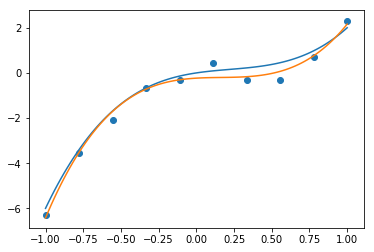

In [27]:
coefs = scipy.polyfit(x, y, deg = 3)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Теперь мы почти попали. Перед тем как читать дальше, подумайте над задачей

Задание: попробуйте увеличить степень полинома. Что произойдет с графиком нашего приближения? Попробуйте сформулировать проблему, с которой мы столкнулись. Какие требование к нашему многочлену нам надо предъявлять, чтобы решить эту проблему?

То, что вы увидели в предыдущей задаче в машинном обучении принято называеть переобучением (overfittig). Если мы используем достаточно сложную модель (то есть модель, у которой много параметров, в нашем случае -- многочлен достаточно высокой степени), то у модели появляется возможность "выучить" все точки, которые она видела. Например, если задано n точек, всегда можно подобрать многочлен степени n-1, который через них проходит (если вы не знакомы с этим фактом, подумайте, как его доказать).



In [55]:
x_test = 2 * np.random.random(10) - 1

Задание. Напишите функцию, которая для данного многочлена считает его качество на тестовом множестве (то есть среднеквадратичное отклонение между значениями функции f и многочлена P на тестовой выборке.

In [56]:
def MSE(x_test, f, poly):
    pass

Задание. Нарисуйте график зависимости ошибки от степени многочлена.


Задание. Как меняется график, если увеличивать количество точек в множестве, на которм мы подбираем многочлен (x)

## Пример Рунге

В этом разделе описывается интересный математический феномен. Если он вам не очень интересен, раздел можно пропустить без ущерба для понимания.

Вообще говоря, увеличение количества точек не всегда ведет к улучшению аппрохимации многочленом. Рассмотрим так называемый "пример Рунге":

In [77]:
def f(x):
    return 1.0 / (25 * x ** 2 + 1)

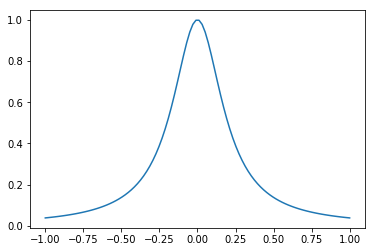

In [78]:
plt.plot(x100, f(x100))

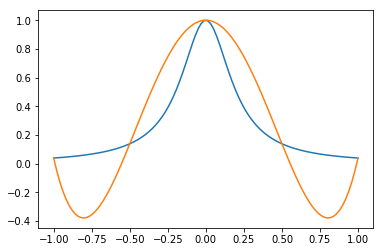

In [89]:
degree = 4
x = np.linspace(-1, 1, degree+1)
y = f(x)
coefs = scipy.polyfit(x, y, deg=degree)
poly = scipy.poly1d(coefs)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Попробуйте менять количество точек и убедитесь, что с его увеличением становится только хуже. Этот артефакт связан с тем, как устроена полиномиальная интерполяция. Оказывается, что для нее важно, какие выбирать точки, и равномерный выбор точек работает довольно плохо. Случайные точки скорее всего работают еще хуже (провертье!) а правильный способ выбирать точки выглядит так:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


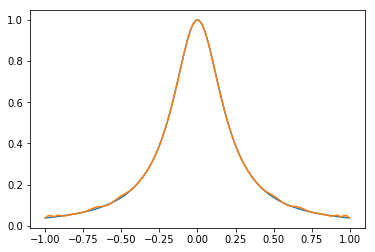

In [123]:
degree = 50
x = np.sin((degree + 1) * np.arcsin(np.linspace(-1, 1, degree + 1)))
y = f(x)
coefs = scipy.polyfit(x, y, deg=degree)
poly = scipy.poly1d(coefs)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Эти точки -- неслучайные, они являются нулями многочлена Чебышева степени n. Про многочлены Чебышева и их связь с интерполяцией можно почитать в википедии.


## Кроссвалидация

Если вы решите поучаствовать в каком-нибудь соревновании по машинному обучению, вы увидите, что тестовое множество вам недоступно (иначе было бы неинтересно: очень легко обучиться предсказывать то, что ты уже видел)

В реальной жизни обычно тоже считают, что на тестовом множестве можно провериться один раз -- в самом конце. Иначе вы начнете подкручивать параметры глядя на результат на тестовой выборке и, сами того не замечая, переобучитесь.

Как поступать в такой ситуации? Придется пожертвовать частью точек, которые даны нам для обучения и использовать их для подбора параметров в нашем алгоритме (в нашем случае это степень многочлена).

Такая процедура называется кросс-валидацией. Обычно для кроссвалидации оставляют 10% данных и повторяют операцию 10 раз, каждый раз выбирая другие 10%.

Задание. Проделайте описанную операцию с нашим зашумленным набором данных. Убедитесь, что она тоже покажет, опитимальную степень 3.

Задание. Проделайте все вышеописанное с функцией $f(x) = \frac{1}{1 + e^{-x}}$ на отрезке [-3, 3] Как оптимальная степень зависит от количества точек, по которым вы подбираете многочлен?

## Регуляризация

Давайте вернемся к приближению нашей функции 

In [5]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

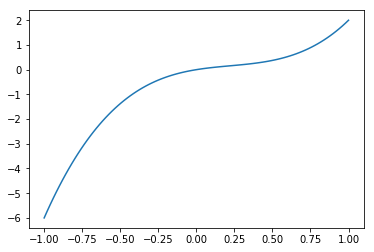

In [8]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))


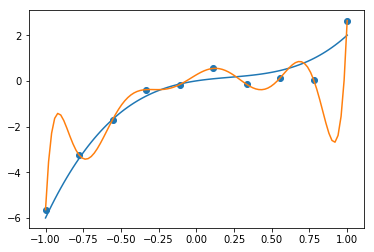

In [10]:
x = np.linspace(-1, 1, 10)
y = f(x) + np.random.normal(0, 0.5, 10)
coefs = scipy.polyfit(x, y, deg = 9)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

In [ ]:
Давайте сильно увеличим число точек в обучающей выборке

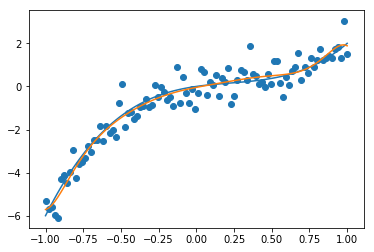

In [11]:
x = np.linspace(-1, 1, 100)
y = f(x) + np.random.normal(0, 0.5, 100)
coefs = scipy.polyfit(x, y, deg = 9)
poly = scipy.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Выглядит, как почти точное соответствие нашей исходной функции. Но является ли это приближение хорошим? Давайте посмотрим на коэффициенты получившегося многочлена

In [14]:
coefs

array([-14.49673192,  -1.30607277,  25.78313007,   3.8461612 ,
       -13.0642563 ,  -3.25391451,   4.20435606,  -1.15517674,
         1.37359763,  -0.04378766])

Получается, что в нашем приближении коэффициент при $x^9$ равен -14, а коэффициент при $x^7$ равен 25. Ясно, что это на самом деле очень странный многочлен, который чисто случайно почт совпадает с нашим многочленом на интересующем нас отрезке. 

Задание. Постройте график аналогичный предыдущему и убедитесь, что вне отрезка [-1, 1] получившийся полином очень не похож на наш исходный

Это общая проблема -- как правило экстраполировать (обобщать знания в сторону значений, которые мы раньше не встречали) гораздо сложнее чем интерполировать (обощать данные внутри интервала, где у нас есть примеры)
<img src="https://imgs.xkcd.com/comics/extrapolating.png">

Задание. Проделайте все то же самое, но не используйте точки от [0, 0.5] для обучения. (совет. такие точеки можно сгенерировать вот так: 

In [45]:
x = np.linspace(-1, 1, 200)
x = x[(x < 0) + (x > 0.5)] #Подумайте, почему это работает

Убедитесь, что для полинома высокой степени на пропущенном кусочке получается полная ерунда (начиная с какой степени становится плохо? От чего это зависит?)

Для того, чтобы бороться с такими проблемами -- слишком сложная модель там, где хватило бы и более простой -- есть трюк под названием "регуляризация".

Мы стараемся минимизировать не только суммарную ошибку $\sum(f(x_i) - P(x_i))^2$ но и сложность модели. Что такое сложность модели можно определять по разному, но одним из хороших вариантов может быть сумма квадратов коэффициентов многочлена. Таким образом мы будем пытаться оптимизировать функцию такого вида: $$ \sum (f(x_i) -P(x_i))^2 + \alpha \sum a_i^2$$

Коэффициент $\alpha$ отвечает за то, насколько много внимания мы обращаем на сложность. К сожалению функция polyfit не умеет подбирать параметры в такой постановке, поэтому нам придется познакомиться с другим инструментом. 

## Линейная регрессия

In [51]:
import sklearn.linear_model

In [57]:
reg = sklearn.linear_model.Ridge()

Этот класс реализует Ридж-регрессию, то есть подбирает коэффициенты в линейной функции с учетом регуляризации, описанной в предыдущем абзаце. При этом у каждой точки может быть сколько угодно координат. Поскольку мы хотим получить в итоге полином, для каждой точке мы сделаем координаты $x, x^2, x^3, \dots, x^n$

In [108]:
n_dots = 100
deg = 10
reg = sklearn.linear_model.Ridge(alpha=0.1) #No regularisation
x = np.linspace(-1, 1, n_dots)
y = f(x) + np.random.normal(0.0, 1.0, n_dots)

X = [[t ** i for i in range(1, deg+1)] for t in x]
reg.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

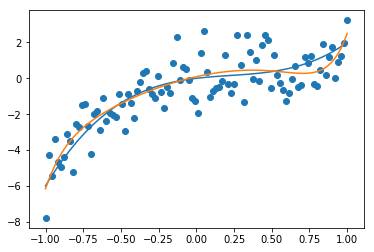

In [109]:
x100 = np.linspace(-1, 1, 100)
X100 = [[t ** i for i in range(1, deg+1)] for t in x100]
plt.scatter(x,y)
plt.plot(x100, f(x100))
plt.plot(x100, reg.predict(X100))

Задание. Разберитесь, что происходит в предыдущих блоках.

Задание. Поэкспериментируйте с параметром регуляризации. Вы можете посмотреть reg.coef_, чтобы увидеть коэффициенты многочлена.

Задание. Посмотрите, удастся ли вам с помощью регуляризации исправить проблему в случае, когда есть внутренняя область в которой нет учебных данных

Задание. Постройте график ошибки на тесте в зависимости от значения параметра. Попробуйте выбрать значения этого параметра с помощью кросс-валидации.